In [2]:
# load in vectors from openai and googlenews
import json

with open('vectors_word2vec-google-news.json') as f:
    vectors_gnews = json.load(f)
    
with open('vectors_openai_ada.json') as f:
    vectors_openai = json.load(f)


In [3]:
import matplotlib.pyplot as plt


def render_vector(vector):
    """Visualize the values of the vector in a bar chart

    Args:
    vector (list): a list of floating point values
    """
    plt.bar(range(len(vector)), vector)
    plt.xlabel('Dimension')
    plt.ylabel('Value')
    plt.title('Vector')
    plt.show()

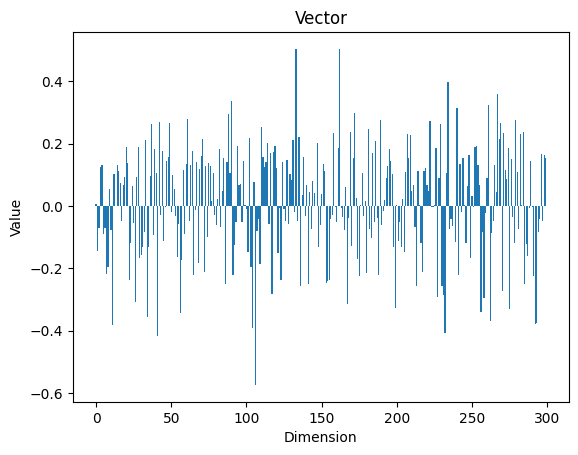

In [4]:
render_vector(vectors_gnews['queen'])

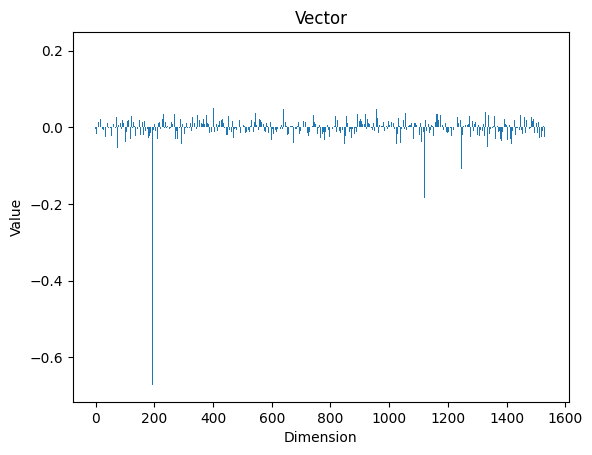

In [5]:
render_vector(vectors_openai['queen'])

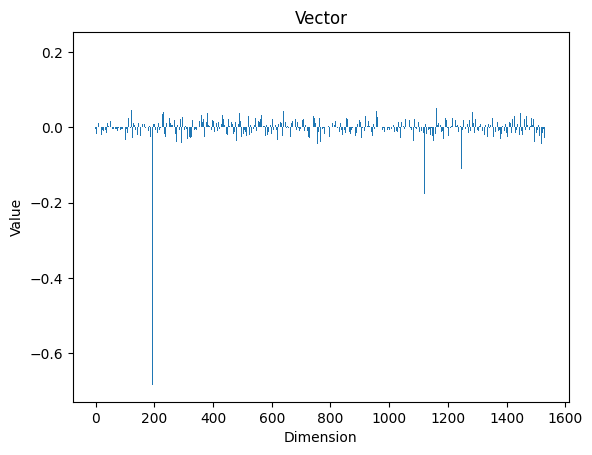

In [6]:
render_vector(vectors_openai['dog'])

In [11]:
import numpy as np
from sklearn.decomposition import PCA


def perform_pca(vectors: dict):
    """Perform PCA on the word vectors and return the PCA-transformed vectors"""
    X = np.array(list(vectors.values()))
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X)
    X_pca = {list(vectors.keys())[i]: X_pca[i] for i in range(len(vectors))}
    return X_pca


vectors_google_pca = perform_pca(vectors_gnews)
vectors_openai_pca = perform_pca(vectors_openai)


[-0.88332433  0.16380937  0.462909  ]


In [30]:
import matplotlib.pyplot as plt


def render_vectors_3d(vectors: dict):
    """Render 3-dimensional vectors (key: [,,,]) in a 3D plot"""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # plot the vectors as points
    for key, vector in vectors.items():
        ax.scatter(vector[0], vector[1], vector[2])
        ax.text(vector[0], vector[1], vector[2], key)


    # figure out the max and min values for each dimension
    min_x = min(v[0] for v in vectors.values())
    max_x = max(v[0] for v in vectors.values())
    min_y = min(v[1] for v in vectors.values())
    max_y = max(v[1] for v in vectors.values())
    min_z = min(v[2] for v in vectors.values())
    max_z = max(v[2] for v in vectors.values())
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.set_zlim([min_z, max_z])
    plt.show()


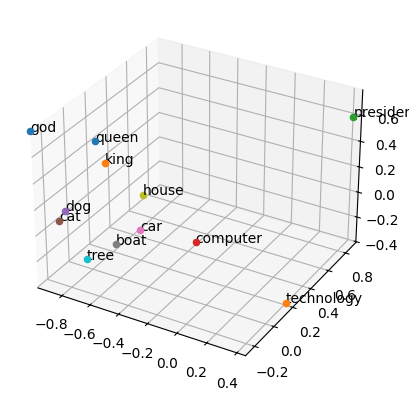

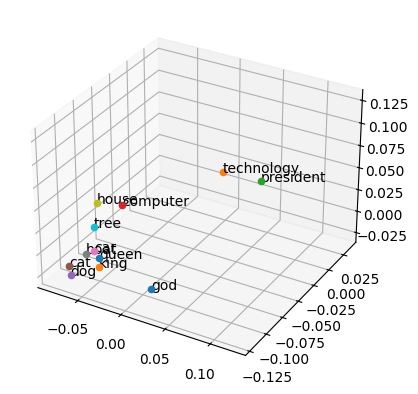

In [41]:
# get subset of the vectors for plotting
words = ['queen', 'king', 'president', 'computer', 'dog', 'cat', 'car', 'boat', 'house', 'tree', 'god', 'technology']
word_pca_vectors_google = {word: vectors_google_pca[word] for word in words}
word_pca_vectors_openai = {word: vectors_openai_pca[word] for word in words}


# plot the vectors
render_vectors_3d(word_pca_vectors_google)
render_vectors_3d(word_pca_vectors_openai)

In [52]:
# compute the 10 most similar words to 'queen' using cosine similarity
def cosine_similarity(v1, v2):
    """Compute the cosine similarity between two vectors"""
    dot_product = sum([a * b for a, b in zip(v1, v2)])
    magnitude = (sum([a**2 for a in v1]) * sum([a**2 for a in v2])) ** 0.5
    return dot_product / magnitude

def most_similar(word: str, vectors: dict) -> list[list]:
    """Return the 10 most similar words and similarities to the given word"""
    word_vector = vectors[word]
    similarities = {w: cosine_similarity(word_vector, vector) for w, vector in vectors.items()}
    most_similar_words = sorted(similarities, key=similarities.get, reverse=True)
    return [(word, similarities[word]) for word in most_similar_words[:10]]

word = 'dog'
most_similar(word, vectors_gnews)

[('dog', 1.0),
 ('cat', 0.7609457089782209),
 ('animal', 0.6438012664235857),
 ('horse', 0.482580719970904),
 ('bird', 0.4504405406712793),
 ('child', 0.3700998924526893),
 ('baby', 0.35600909384223794),
 ('boy', 0.3521681764899671),
 ('woman', 0.35110471542645383),
 ('mother', 0.34550301136283873)]

In [53]:
most_similar(word, vectors_openai)

[('dog', 1.0),
 ('animal', 0.8854722499631306),
 ('god', 0.8659861372339701),
 ('cat', 0.863492920670664),
 ('fish', 0.8566396088658141),
 ('bird', 0.8556399383011418),
 ('diet', 0.852973107041222),
 ('horse', 0.8520685650748294),
 ('drug', 0.8506114760476617),
 ('gun', 0.84935545146278)]

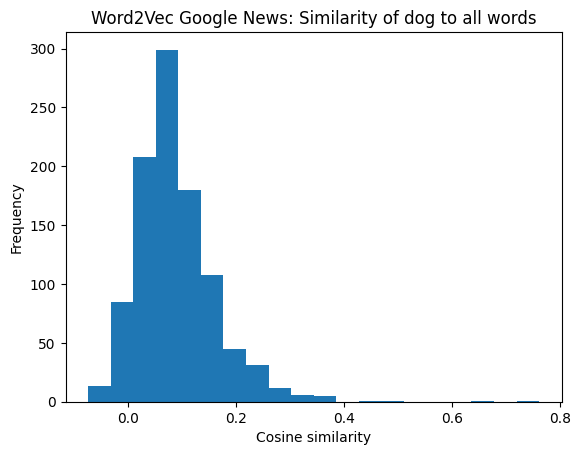

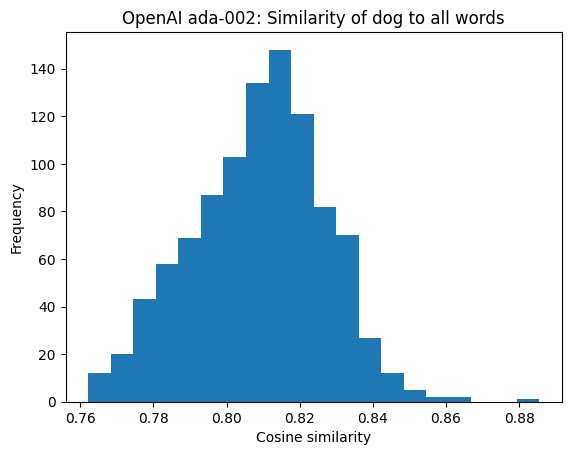

In [56]:
def cosine_similarity_histogram(word: str, vectors: dict, model_name: str):
    """Plot a histogram of the cosine similarities of the word to all other words"""
    word_vector = vectors[word]
    similarities = [cosine_similarity(word_vector, vectors[w]) for w in vectors if w != word]
    plt.hist(similarities, bins=20)
    plt.xlabel('Cosine similarity')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Similarity of {word} to all words')
    plt.show()

cosine_similarity_histogram('dog', vectors_gnews, 'Word2Vec Google News')
cosine_similarity_histogram('dog', vectors_openai, 'OpenAI ada-002')